<a href="https://colab.research.google.com/github/buche2/CAS_AI_2020_2021/blob/main/Examen_HS_CAS_Artificial_Intelligence_2020_2021_C%C3%A9dric_Moullet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Bearbeitungs-Zeit = '10:00 - 12:00' #@param {type:"string"}

In [ ]:
@title Date fields
Datum = '2021-04-06' #@param {type:"date"}

In [ ]:
Name = 'Moullet' #@param {type:"string"}
Vorname = 'C\xE9dric' #@param {type:"string"}

# **Deeplearning**

##**1 Gradient**

### Aufgabe 1:

Für eine mehrdimensionale Funktion $\displaystyle f\colon \mathbf {R} ^{n}\to \mathbf {R} $
ist ihr gradient 
$\displaystyle \nabla f\colon \mathbf {R} ^{n}\to \mathbf {R} ^{n}$
 definiert als Spalten-Vektor ihrer partiellen Ableitungen in einem Punkt 
$\displaystyle \mathrm {p} =(x_{1},\ldots ,x_{n})$:

$\displaystyle \nabla f(p)={\begin{bmatrix}{\frac {\partial f}{\partial x_{1}}}(p)\\\vdots \\{\frac {\partial f}{\partial x_{n}}}(p)\end{bmatrix}}.$

**Gegeben:**
Eine Funktion mit 2 unabhängigen Variablen $x$ und $y$: $f(x,y)= e^{3x} + ln(5y)$

**Bestimmen Sie:**
Den Gradienten der o.a. Funktion im Punkt $\mathrm {p} = (x, y)$ mit  $x = 0, y = 1$:

$\displaystyle \nabla f(0,1)={\begin{bmatrix}{\frac {\partial f}{\partial x}}(0,1)\\{\frac {\partial f}{\partial y}}(0,1)\end{bmatrix}}.$


*Hinweis:* Berechnen Sie den Gradienten zunächst manuell auf Papier.

***Bitte, die Zahlen innerhalb der Klammern durch Komma getrennt eingeben:***



---

In [ ]:
# Comment Cédric Moullet:
# Derivative according to x of exp(3x) is 3exp(3x)
# Derivative according to y of ln(5y) is 1/y

In [ ]:
Gradient = "[  3,1  ]" #@param {type:"string"}


##**2 Dense Networks**

### Aufgabe 2:

**Gegeben:** 

$y = X^3 \cdot W + b + noise$

mit

$
\begin{align}
& y && - && Output/Label \\
& X && - && Input Data-Matrix\\
& W_{true} && - && Gewichte-Matrix\\
& b_{true} && - && Bias\\
& noise && - && Noise\\
\end{align}
$

und folgenden Parametern:

In [ ]:
import tensorflow as tf
from tensorflow.nn import relu, tanh
import numpy as np

# Definition der Daten

# seed
tf.random.set_seed(1234)

INPUT_SIZE = 5
OUTPUT_SIZE = 1

TRUE_W = tf.Variable(tf.random.normal((INPUT_SIZE, OUTPUT_SIZE)), name='w')
TRUE_B = tf.Variable(tf.zeros(OUTPUT_SIZE, dtype=tf.float32), name='b')

NUM_EXAMPLES = 1000

# A vector of random x values
x = tf.random.normal(shape=[NUM_EXAMPLES, INPUT_SIZE])
x_test = tf.random.normal(shape=[NUM_EXAMPLES, INPUT_SIZE])

# Generate some noise
noise = tf.random.normal(shape=[NUM_EXAMPLES, OUTPUT_SIZE])
noise_test = tf.random.normal(shape=[NUM_EXAMPLES, OUTPUT_SIZE])

# Calculate y
y = x**3 @ TRUE_W + TRUE_B + noise
y_test = x_test**3 @ TRUE_W + TRUE_B + noise_test
print(f"input-shape:{x.shape}, output-shape:{y.shape}")

input-shape:(1000, 5), output-shape:(1000, 1)


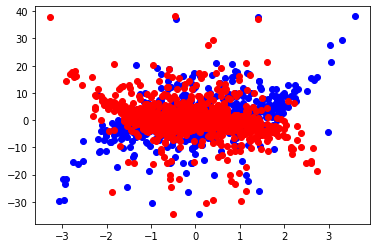

In [ ]:
# Plot all the data
import matplotlib.pyplot as plt

plt.scatter(x_test[:,0], y_test[:,0], c="b")
plt.scatter(x_test[:,1], y_test[:,0], c="r")
plt.show()


**Wir möchten nun die wahren Gewichte-Matrix und Bias-Vektor mit Hilfe eines Dense Neuronal Networks bestimmen.**

####**Aufgabe 2.1:** In der ```MyModel``` Klasse initialisieren Sie bitte Gewichte und Biases für **2 (zwei) Hidden Layer** und das **Output-Layer** eines Dense Networks mit:
**Hidden 1: 10 Neuronen**

**Hidden 2: 8 Neuronen**

####**Aufgabe 2.2:** In der ```MyModel``` Klasse definieren Sie die \_call_ Funktion:
```
def __call__(self, x)
```
Vrewenden sie dabei die ***tanh*** Aktivierungs-Funktion.

####**Aufgabe 2.3:** Erzeugen Sie eine Model-Instanz und verifizieren Sie diese mit

```
model(x).numpy()
```




####**Aufgabe 2.4:** Printen Sie die **Namen, Shapes und Werte** von allen Model-Variablen

####**Aufgabe 2.5:** Wieviele **neue Gewichte** werden erzeugt, wenn Sie die Anzahl der Neuronen vom Hidden 2 vedoppeln, d.h. für **Hidden Layer 2 - 16 Neuronen** anlegen? Geben Sie die Anzahl der zusätzlichen Gewichte **nur für den Layer 2** aus.


---


Hinweis: Die Veränderung der Anzahl der Output-Neuronen eines Layers hat zwangsweise den Einfluss auch auf das Gewichte-Shape des unterstehenden Layers. Daher gilt die Frage einfachheitshalber nur für den selben Layer 2.

---



In [ ]:
Anzahl_Neuer_Gewichte =  80#@param {type:"number"}


####**Aufgabe 2.6:** Warum wird hier ein anderer Seed verwendet, als im vorherigen Code-Abschnitt "Definition der Daten"? Beschreiben Sie die Ursache mit eigenen Worten in einem Satz.

In [ ]:
Ursache = "With this, the generated data are completely independent of the weights and biases " #@param {type:"string"}


In [ ]:
# seed
tf.random.set_seed(5678)

class MyModel(tf.Module):
  def __init__(self, input_size, output_size, **kwargs):
    super().__init__(**kwargs)

    self.INPUT_SIZE = input_size
    self.OUTPUT_SIZE = output_size
    self.LAYER_1_OUTPUT_SIZE = 10
    self.LAYER_2_OUTPUT_SIZE = 8
    
    # Aufgabe 2.1 ##############################

    self.w1 = tf.Variable(tf.random.normal((self.INPUT_SIZE, self.LAYER_1_OUTPUT_SIZE)), name='w1')
    self.b1 = tf.Variable(tf.zeros(self.LAYER_1_OUTPUT_SIZE, dtype=tf.float32), name='b1')

    self.w2 = tf.Variable(tf.random.normal((self.LAYER_1_OUTPUT_SIZE, self.LAYER_2_OUTPUT_SIZE)), name='w2')
    self.b2 = tf.Variable(tf.zeros(self.LAYER_2_OUTPUT_SIZE, dtype=tf.float32), name='b2')

    self.w3 = tf.Variable(tf.random.normal((self.LAYER_2_OUTPUT_SIZE, self.OUTPUT_SIZE)), name='w3')
    self.b3 = tf.Variable(tf.zeros(self.OUTPUT_SIZE, dtype=tf.float32), name='b3')

    ############################## Aufgabe 2.1 #


  # Aufgabe 2.2 ##############################
  def __call__(self, x):
     
     # Code Aufgabe 2.2 hier

    x_1 = tanh(x @ self.w1 + self.b1)
    x_2 = tanh(x_1 @ self.w2 + self.b2)
    x_out = x_2 @ self.w3 + self.b3
    return x_out

    
    return x_out
  ############################## Aufgabe 2.2 #


# Aufgabe 2.3 ##############################
model = MyModel(5,1)
# Verify the model works
print(model(x).numpy())
############################## Aufgabe 2.3 #


# Aufgabe 2.4 ##############################
# List the variables tf.modules's built-in variable aggregation.
for var in model.variables:
  print("Variable:", var.name, var.shape)

############################## Aufgabe 2.4 #




[[-8.58749986e-01]
 [ 1.31477737e+00]
 [ 3.63991559e-01]
 [-1.20554996e+00]
 [ 1.37978220e+00]
 [ 9.03165638e-01]
 [ 2.47318864e+00]
 [ 1.99211359e+00]
 [ 1.33214211e+00]
 [-7.32538223e-01]
 [-1.95712614e+00]
 [ 1.30829227e+00]
 [-8.92019510e-01]
 [-9.97414589e-01]
 [-1.77908897e+00]
 [-2.06710577e+00]
 [ 1.63948488e+00]
 [ 1.97358882e+00]
 [-1.38302064e+00]
 [-9.73970175e-01]
 [ 4.00444835e-01]
 [-1.68196261e+00]
 [-2.07866955e+00]
 [ 2.06999826e+00]
 [-4.13087845e-01]
 [ 1.38423991e+00]
 [ 8.23145032e-01]
 [ 2.35481524e+00]
 [-1.06866193e+00]
 [-1.37312222e+00]
 [-1.33014011e+00]
 [-1.17862582e+00]
 [-1.96343625e+00]
 [-1.66161370e+00]
 [-1.42303443e+00]
 [ 1.44598007e-01]
 [-5.91014624e-01]
 [ 1.32053018e+00]
 [ 6.26714975e-02]
 [-2.37889826e-01]
 [ 1.68964756e+00]
 [ 1.35301614e+00]
 [-2.38522339e+00]
 [-1.23086190e+00]
 [ 3.04931939e-01]
 [ 1.39980078e+00]
 [-2.29747105e+00]
 [-1.26634502e+00]
 [ 5.98493993e-01]
 [-2.01882267e+00]
 [ 2.66856074e-01]
 [ 2.05842304e+00]
 [ 2.1156232

####**Aufgabe 2.7:** Definieren Sie das Training-Loop für **2000 Epochs**.  Printen Sie die **Epoch Nummer** und den **Loss** alle **100 Epochs**



####**Aufgabe 2.8:** Trainieren Sie das Model

In [ ]:
from tensorflow.keras.optimizers import Adam

opt = Adam(learning_rate=0.01)
# This computes a single loss value for an entire batch
def loss(target_y, predicted_y):
  return tf.reduce_mean(tf.square(target_y - predicted_y))

# Given a callable model, inputs, outputs, and a learning rate...
def train(model, x, y, learning_rate):

  with tf.GradientTape() as t:
    # Trainable variables are automatically tracked by GradientTape
    current_loss = loss(y, model(x))

  # Use GradientTape to calculate the gradients with respect to W and b
  grads = t.gradient(current_loss, model.trainable_variables)
  opt.apply_gradients(zip(grads, model.trainable_variables))

# Init Model
model = MyModel(INPUT_SIZE, OUTPUT_SIZE)
# Collect the history of W-values and b-values to plot later

# Aufgabe 2.7 ##############################
epochs = range(2000)
# Define a training loop
def training_loop(model, x, y):

  for epoch in epochs:
     # Update the model with the single giant batch
    train(model, x, y, learning_rate=0.1)

    current_loss = loss(y, model(x))
    if (epoch % 100 == 0):
      print("Epoch %2d: loss=%2.5f" %
          (epoch, current_loss))


############################## Aufgabe 2.7 #
    
# Aufgabe 2.8 ####################
# Do the training

training_loop(model, x, y)

Epoch  0: loss=48.01633
Epoch 100: loss=21.94885
Epoch 200: loss=13.15014
Epoch 300: loss=7.71759
Epoch 400: loss=4.64107
Epoch 500: loss=3.25050
Epoch 600: loss=2.58602
Epoch 700: loss=2.21390
Epoch 800: loss=1.97154
Epoch 900: loss=1.80127
Epoch 1000: loss=1.66842
Epoch 1100: loss=1.57218
Epoch 1200: loss=1.49004
Epoch 1300: loss=1.42588
Epoch 1400: loss=1.35181
Epoch 1500: loss=1.29470
Epoch 1600: loss=1.24684
Epoch 1700: loss=1.21354
Epoch 1800: loss=1.17352
Epoch 1900: loss=1.14382


####**Aufgabe 2.9:** Plotten Sie den Output des trainierten Models **$\hat{y}_{test}$** vs. **Target Data** für den **Test Dataset**: $\hat{y}_{test} = model(X_{test}) \nobreakspace vs. \nobreakspace y_{test}$

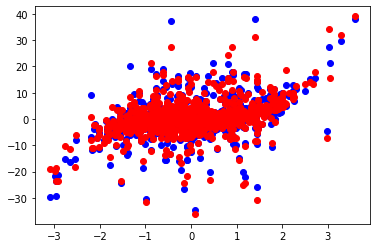

In [ ]:
# Aufgabe 2.9
# Visualize how the trained model performs
plt.scatter(x_test[:, 0], y_test[:, 0], c="b")
plt.scatter(x_test[:, 0], model(x_test)[:, 0], c="r")
plt.show()

####**Aufgabe 2.10:** Berechnen Sie den Loss für den **Test Dataset**

In [ ]:
# Aufgabe 2.10
print("Current loss: %1.6f" % loss(model(x), y).numpy())

Current loss: 1.118439


##**LSTM**

### Aufgabe 3:

Wir wollen jetzt ein LSTM Model auf einem Image-Dataset trainieren.

####**Aufgabe 3.1:** Ist das überhaupt möglich?

In [ ]:
Antwort = "ja" #@param {type:"string"}


####**Aufgabe 3.2:** Ist das optimal?

In [ ]:
Antwort = "nein" #@param {type:"string"}

####**Aufgabe 3.3:** Bei welcher Art von Image-Daten wäre die Verwendung von LSTM-Layers durchaus angebracht? Bitte, eine am besten geignete Option auswählen.

In [ ]:
Antwort = "Bild Sequenzen (Games, Film)" #@param ["Mond Bilder", "Bild Sequenzen (Games, Film)", "Fotos von Justin Bieber", "please select"]


In [ ]:
import tensorflow as tf
from tensorflow import keras

# Wir laden hier das Fashion Mnist Dataset
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step



Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents. Each image is mapped to a single label:

$
\begin{array}{|c|l|}
  \hline \hline
  Label & Class\\
  \hline
  \hline			
  0 & T-shirt/top \\\hline
  1 & Trouser \\\hline
  2 &  Pullover \\\hline
  3 &  Dress \\\hline
  4 &  Coat \\\hline
  5 &  Sandal \\\hline
  6 &  Shirt \\\hline
  7 &  Sneaker \\\hline
  8 &  Bag \\\hline
  9 &  Ankle \nobreakspace Boot \\\hline
  \hline  
\end{array}
$

####**Aufgabe 3.4:** Verifizieren Sie die Unique-Labels in dem Train und Test Datasets.

In [ ]:
print(np.unique(train_labels))
print(np.unique(test_labels))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [ ]:
# Comment Cédric Moullet: 10 possible labels are available in the train and test dataset

####**Aufgabe 3.5:** Skalieren Sie die Image Daten auf den Werte-Bereich (0, 1)

In [ ]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
print(np.max(train_images))
print(np.max(test_images))

1.0
1.0


In [ ]:
# shapes
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

####**Aufgabe 3.6:** Die Image-Arrays aus Fashion-Mnist Dataset haben Shape (28, 28). Angenommen, ein Image wäre vom Shape **(28, 64)**. Wieviele **"Features"** und **"Timesteps"** hätte ein solches Image?

In [ ]:
Features =  1#@param {type:"integer"}
Timesteps =  1792#@param {type:"integer"}


####**Aufgabe 3.7:** Definieren ein LSTM-Network mit den folgenden Parametern:


1.   1 LSTM Hidden Layer mit 8 Units mit dem Fashion-Mnist Input-Shape
2.   1 Dense Hidden Layer mit 32 Units
3.   1 Dense Output Layer mit der Anzahl der Units, die zu Fashion-Mnist    Dataset passt
4. Verwenden Sie auch passende Aktivierungs-Funktionen pro Layer

Erstellen Sie dazu die Funktion

```
def build_lstm_model()
```
die eine Model-Instanz (Objekt) zurück gibt.


In [ ]:
from tensorflow import keras
def build_lstm_model():
  # Aufgabe 3.7
  model = keras.Sequential([ 
    keras.layers.LSTM(8),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
  ])

  return model

####**Aufgabe 3.8:** Erstellen Sie nun eine Model-Instanz mit Hilfe der eben definierten Funktion 
```
def build_lstm_model()
```
####Ergänzen Sie das fehlende Loss. Bitte, folgendes dabei beachten: Die Labels sind **nicht** one-hot encoded, sondern Integers von 0 bis 9.

In [ ]:
model = build_lstm_model()
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  # Fashion-Mnist labels sind Integers
              metrics=['accuracy'])

####**Aufgabe 3.9:** Fitten Sie das Model auf Trainings-Daten für **5 Epochen**. Das Model soll ca. 81% Accuracy erreichen.

In [ ]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.7180 - accuracy: 0.7348
Epoch 2/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.6141 - accuracy: 0.7758
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.5643 - accuracy: 0.7956
Epoch 4/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.5264 - accuracy: 0.8089
Epoch 5/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4999 - accuracy: 0.8222


####**Aufgabe 3.10:** Konvertieren Sie die Labels zu **one-hot-encoded** mit Hilfe von einer passenden Funktion aus ***tf.keras.utils*** Package

In [ ]:
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

####**Aufgabe 3.11:** Erstellen Sie wieder eine neue Model-Instanz mit ``` build_lstm_model()``` und ergänzen Sie das fehlende Loss. Die Labels sind nun one-hot-encoded.

In [ ]:
model = build_lstm_model()
model.compile(optimizer='adam',
              loss='binary_crossentropy', # labels sind nun one-hot encoded
              metrics=['accuracy'])

####**Aufgabe 3.12:** Fitten Sie wieder das Model auf den Train Daten für 5 Epochen.

In [ ]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 17s 8ms/step - loss: 0.3064 - accuracy: 0.3108
Epoch 2/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1489 - accuracy: 0.6743
Epoch 3/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1267 - accuracy: 0.7212
Epoch 4/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1121 - accuracy: 0.7487
Epoch 5/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1039 - accuracy: 0.7744


## **CNN**

### Aufgabe 4:


Wir laden wieder das Fashion-Mnist Dataset

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
train_images, test_images = train_images / 255.0, test_images / 255.0

####**Aufgabe 4.1:** Definieren ein CNN-Network mit den folgenden Parametern:


1.   1 Flatten Layer
2.   1 MaxPooling2D Hidden Layer mit Pooling Size von 2
3.   1 Dense Hidden Layer mit 32 Units
4.   1 Con2D Hidden Layer mit **8 Filters**, **(3, 3) Kernel-Size** mit dem Fashion-Mnist Input-Shape. **Input-Shape** muss **3 Dimensionen** haben. Beachten Sie bitte, dass die Fashion-Mnist Images Schwarz-Weiss sind.
5.   1 Dense Output Layer mit der Anzahl der Units, die zu Fashion-Mnist    Dataset passt
6.   Verwenden Sie auch passende Aktivierungs-Funktionen pro Layer, wenn nötig
7.   Printen Sie das Model-Summary
8.   **Sie müssen die o.a. Layers in der richtigen Reihenfolge einfügen!**

Erstellen Sie dazu die Funktion

```
def build_cnn_model()
```
die eine Model-Instanz (Objekt) zurück gibt und summary printet.


In [ ]:
from keras import models, layers
def build_cnn_model():
  model = models.Sequential()
 
  #Aufgabe 4.1 
  model.add(layers.Conv2D(8, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Flatten())
  model.add(layers.Dense(32,activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))

  return model



####**Aufgabe 4.2:** Erstellen Sie und kompillieren Sie mit ```model.compile``` das CNN Model. Verwenden Sie 'adam' Optimizer und die Metric 'accuracy'. Wählen Sie das passende Loss.


In [ ]:
model = build_cnn_model()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # labels sind nun one-hot encoded
              metrics=['accuracy'])

####**Aufgabe 4.3:** Bevor Sie das model fitten können, müssen Sie die Inputdaten in 4 Dimensionen reshapen. Die letzte Dimension fehlt noch. Bitte ergänzen Sie diese.

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
# Aufgabe 4.3 code hier
train_images = np.expand_dims(train_images, axis=3)

In [ ]:
# Shape (60000, 28, 28, 1) ist erforderlich
train_images.shape

(60000, 28, 28, 1)

In [ ]:
train_labels.shape

(60000,)

####**Aufgabe 4.4:** Fitten Sie das Model für 5 Epochen

In [ ]:
model.fit(train_images,train_labels,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 20s 10ms/step - loss: 0.6382 - accuracy: 0.7796
Epoch 2/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3489 - accuracy: 0.8773
Epoch 3/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2999 - accuracy: 0.8929
Epoch 4/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2773 - accuracy: 0.9003
Epoch 5/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2535 - accuracy: 0.9086


####**Aufgabe 4.5:**  Gegeben ist nun ein Dataset mit 60.000 **Farb-Images** der Grösse 120 x 60 Pixel (Höhe x Breite). Sie wollen ein CNN-Model mit batch_size=32 darauf trainieren. Bitte, **ein** korrektes **Input-Shape** für das CNN-Input auswählen.

In [ ]:
input_dimension_cnn = '(None, 120, 60, 3)' #@param ["please select", "(None, 120, 60)", "(None, 120, 60, 3)", "(None, 32, 120, 60, 3)", "(None, 60, 120, 3)", "(None, 120, 60, 1)"] {allow-input: false}


####**Aufgabe 4.6:** Beschreiben Sie bitte kurz die Bedeutung jeder Dimension des von Ihnen ausgewählten Shapes.

#### Beispiel: (None, 120). 
#### Für was steht **None**?
#### Für was steht **120**?

In [ ]:
dim_1 = "Batch size" #@param {type:"string"}
dim_2 = "Image height" #@param {type:"string"}
dim_3 = "Image width" #@param {type:"string"}
dim_4 = "Color channels" #@param {type:"string"}
dim_5 = "" #@param {type:"string"}


#**Reinforcement Learning**

## Allgemeine Fragen

### Aufgabe 5

####**Aufgabe 5.1:** Definieren Sie mit eigenen Worten die **Markov Property**.

In [ ]:
Antwort = "Markov property is the probability of the next state, given the current state and current action, will be the same as if you give the entire history of interactions (states and actions)" #@param {type:"string"}


####**Aufgabe 5.2:** Definieren Sie mit eigenen Worten die **State-Action-Value Function** $Q(s,a)$. Was berechnet diese Funktion?

In [ ]:
Antwort = "It defines how good it is for an agent to do an action in a given state" #@param {type:"string"}


####**Aufgabe 5.3:** Deep Reinforcement Learning ist dem traditionnelen Supervised-Learning (Machine Learning oder Deep Learning) immer überlegen. Stimmt diese Aussage?

In [ ]:
Antwort = "nein" #@param ["please select", "ja", "nein"]


####**Aufgabe 5.4:** Model eines Environments wird durch dessen Transition- und Reward-Function definiert. Stimm diese Aussage?

In [ ]:
Antwort = "ja" #@param ["please select", "ja", "nein"]

####**Aufgabe 5.5:** Gegeben sind State-Value Function $V(s)$ und die State-Action-Value Function $Q(s,a)$. Definieren Sie die Advantage Function $A(s,a)$ mit Hilfe von $V(s)$ und $Q(s,a)$. Benutzen Sie vereinfacht Symbole A, V und Q.

In [ ]:
Antwort = "A = Q - V" #@param {type:"string"}


## **DQN**

###Aufgabe 6

Gegeben sind:


1.   Cart-Pole Environment v1 (CartPole-v1).
2.   GreedyStrategy Klasse, um die Aktionen während "Play" aufzurufen.
3.   EGreedyExpStrategy Klasse, um die Aktionen während "Train" aufzurufen. Diese Klasse sorgt auch für einen sanften exponetiellen Abstieg von epsilon.
4.   Die Methode der Agenten-Klasse **get_action** wurde entfernt. Stattdessen soll die Methode der beiden o.a. Klassen ```select_action(model, state)``` verwendet werden.
5.  Zusätzlich zu der bekannten Methode der DQN Klasse ```update_model(other_model: Model)``` (diese kopiert sämtliche Gewichte von Online zu Target Model) gibt es die neue Methode ```update_model_mixed(other_model: Model, tau=None).``` Diese neue Methode kombiniert die Gewichte von Online und Target Model, vobei tau-Prozentanteil von Online-Model in Target-Model hineinfliesst.
6. **Der o.a. Code ist vollständig und lauffähig. Sie müssen nichts neu kodieren!**
7.  Die Aufgaben werden es sein, diesen Code **zu verwenden**.


**Imports**

In [ ]:
import random
import collections
import os
import numpy as np
from itertools import cycle, count

import gym
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *

**Pfade und Model-Verzeichnis**

In [ ]:
MODELS_PATH = "content/models"
MODEL_PATH = os.path.join(MODELS_PATH, "dqn.h5")
TARGET_MODEL_PATH = os.path.join(MODELS_PATH, "target_dqn.h5")

if not os.path.exists(MODELS_PATH):
    os.makedirs(MODELS_PATH)

**Environment**

In [ ]:
env = gym.make('CartPole-v1')
print("Observation Space:", env.observation_space.shape)
print("Action Space:", env.action_space.n)
print("Max. Steps per Episode:", env.spec.max_episode_steps)
print("Reward Threshold:", env.spec.reward_threshold)

Observation Space: (4,)
Action Space: 2
Max. Steps per Episode: 500
Reward Threshold: 475.0


**Greedy Strategy**

In [ ]:
class GreedyStrategy():
    def __init__(self):
        self.exploratory_action_taken = False

    def select_action(self, model, state):
      q_values = model(state)
      return np.argmax(q_values)

**Epsilon Greedy Strategy**

In [ ]:
class EGreedyExpStrategy():
    def __init__(self, init_epsilon=1.0, min_epsilon=0.01, decay_steps=20000):
        self.epsilon = init_epsilon
        self.init_epsilon = init_epsilon
        self.decay_steps = decay_steps
        self.min_epsilon = min_epsilon
        self.epsilons = 0.01 / np.logspace(-2, 0, decay_steps, endpoint=False) - 0.01
        self.epsilons = self.epsilons * (init_epsilon - min_epsilon) + min_epsilon
        self.t = 0
        self.exploratory_action_taken = None

    def _epsilon_update(self):
        self.epsilon = self.min_epsilon if self.t >= self.decay_steps else self.epsilons[self.t]
        self.t += 1
        return self.epsilon

    def select_action(self, model, state):
        self.exploratory_action_taken = False
       
        q_values = model(state)

        if np.random.rand() > self.epsilon:
            action = np.argmax(q_values)
        else:
            action = np.random.randint(len(q_values))

        self._epsilon_update()
        self.exploratory_action_taken = action != np.argmax(q_values)
        return action



####**Aufgabe 6.1:** Innerhalb der **```train```** Methode der Agenten-Klasse rufen Sie die Methode  ```self.strategy.select_action(model, state)``` der **```EGreedyExpStrategy```** Klasse auf. Diese Methode gibt die Aktion zurück und selektiert ab und zu random actions.

####**Aufgabe 6.2:** Innerhalb der **```train```** Methode der Agenten Klasse rufen Sie die Methode ```update_model(other_model: Model)``` auf. Diese Methode soll nur unter folgender Bedingung aufgerufen werden: ```current_reward_mean > best_reward_mean.``` Sie überträgt sämtliche Gewichte des Online Models auf das Target Model, nur wenn das Online Model Fortschritte macht.

####**Aufgabe 6.3:** Innerhalb der **```train```** Methode der Agenten Klasse rufen Sie die Methode ```update_model_mixed(other_model: Model, tau=0.1)``` auf. Diese Methode soll nur alle **100 Steps** aufgerufen werden. Verwenden Sie dazu diese Bedingung ```if step%self.num_update_steps == 0``` mit ```self.num_update_steps=100.```Der Parameter **```tau = 0.1```**

####**Aufgabe 6.4:** Innerhalb der **```play```** Methode der Agenten-Klasse rufen Sie die Methode  ```self.strategy.select_action(model, state)``` der **```GreedyStrategy```** Klasse auf. Diese Methode gibt die Aktion zurück, ohne zufällige Aktionen auszuwählen.

**Agent**

In [ ]:
class Agent:
    def __init__(self, env: gym.Env, strategy):
        # DQN Env Variables
        self.env = env
        self.observations = self.env.observation_space.shape
        self.actions = self.env.action_space.n
        # DQN Agent Variables
        self.replay_buffer_size = 50_000
        self.train_start = 500
        self.memory: Deque = collections.deque(
            maxlen=self.replay_buffer_size
        )
        self.gamma = .996
        self.tau = .1
       
        self.state_shape = self.observations
        self.learning_rate = 5e-4
        self.dqn = DQN(
            self.state_shape,
            self.actions,
            self.learning_rate,
            self.tau

        )
        self.target_dqn = DQN(
            self.state_shape,
            self.actions,
            self.learning_rate,
            self.tau
        )
        self.batch_size = 32
        self.num_update_steps = 100
        
        self.strategy = strategy


    def train(self, num_episodes: int):
        last_rewards: Deque = collections.deque(maxlen=5)
        best_reward_mean = 0.0

        for episode in range(1, num_episodes + 1):
            total_reward = 0.0
            state = self.env.reset()
            state = np.reshape(state, newshape=(1, -1)).astype(np.float32)

            for step in count():
                # 6.1:
                action = self.strategy.select_action(self.dqn,state) 
                next_state, reward, done, info = self.env.step(action)
                next_state = np.reshape(next_state, newshape=(1, -1)).astype(np.float32)
                
                if done and total_reward < env.spec.reward_threshold:
                  reward = -100.0

                self.remember(state, action, reward, next_state, done)
                self.replay()
                total_reward += reward
                state = next_state
                
                # 6.3:
                if step%self.num_update_steps == 0:
                  self.target_dqn.update_model_mixed(self.dqn, self.tau)

                if done:
                  if total_reward < env.spec.reward_threshold:
                    total_reward += 100.0
                  print(f"Episode: {episode} Reward: {total_reward} Epsilon: {self.strategy.epsilon}")
                  last_rewards.append(total_reward)
                  current_reward_mean = np.mean(last_rewards)

                  if current_reward_mean > best_reward_mean:
                      # 6.2:
                      self.target_dqn.update_model(self.dqn)
                      best_reward_mean = current_reward_mean
                      self.dqn.save_model(MODEL_PATH)
                      self.target_dqn.save_model(TARGET_MODEL_PATH)
                      print(f"New best mean: {best_reward_mean}")
                      if best_reward_mean > 470:
                        print("Environment solved! Stop training...")
                        return   
                  break


    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def replay(self):
        if len(self.memory) < self.train_start:
            return
        minibatch = random.sample(self.memory, self.batch_size)
        states, actions, rewards, states_next, dones = zip(*minibatch)

        states = np.concatenate(states).astype(np.float32)
        states_next = np.concatenate(states_next).astype(np.float32)
       
        rewards = np.array(rewards).astype(np.float32)
        dones = np.array(dones)

        q_values = self.dqn(states)
        q_values_next = self.target_dqn(states_next)

        for i in range(self.batch_size):
            a = actions[i]
            done = dones[i]
            if done:
                q_values[i][a] = rewards[i]
            else:
                q_values[i][a] = rewards[i] + self.gamma * np.max(q_values_next[i])

        self.dqn.fit(states, q_values)


    def play(self, num_episodes: int):
        self.dqn.load_model(MODEL_PATH)
        self.target_dqn.load_model(TARGET_MODEL_PATH)

        for episode in range(1, num_episodes + 1):
            total_reward = 0.0
            state = self.env.reset()
            state = np.reshape(state, newshape=(1, -1)).astype(np.float32)

            while True:
                # 6.4:
                action = self.strategy.select_action(self.dqn,state) 
                next_state, reward, done, info = self.env.step(action)
                next_state = np.reshape(next_state, newshape=(1, -1)).astype(np.float32)
                total_reward += reward
                state = next_state

                if done:
                    print(f"Episode: {episode} Reward: {total_reward}")
                    break

**DQN**

In [ ]:

class DQN(Model):
    def __init__(self, state_shape: int, num_actions: int, learning_rate: float, tau: float):
        super().__init__()
        self.state_shape = state_shape
        self.num_actions = num_actions
        self.learning_rate = learning_rate
        self.tau = tau
        self.internal_model = self.build_model()

    def build_model(self):
        input_state = Input(shape=self.state_shape)
        x = Dense(units=32)(input_state)
        x = Activation("relu")(x)
        x = Dense(units=32)(x)
        x = Activation("relu")(x)
        q_value_pred = Dense(self.num_actions)(x)
        model = Model(
            inputs=input_state,
            outputs=q_value_pred
        )
        model.compile(
            loss="mse",
            optimizer=Adam(learning_rate=self.learning_rate)
        )
        return model

    def call(self, inputs: np.ndarray) -> np.ndarray:
        return self.internal_model(inputs).numpy()

    def fit(self, states: np.ndarray, q_values: np.ndarray):
        self.internal_model.fit(x=states, y=q_values, verbose=0)

    def update_model(self, other_model: Model):
        self.internal_model.set_weights(other_model.get_weights())

    def update_model_mixed(self, other_model: Model, tau=None):
        new_target_weights = []
        tau = self.tau if tau is None else tau
        for target, online in zip(self.internal_model.get_weights(), other_model.get_weights()):
          target_ratio = (1.0 - self.tau) * target #target_model
          online_ratio = self.tau * online # online_model
          mixed_weights = target_ratio + online_ratio
          new_target_weights.append(mixed_weights)

        self.internal_model.set_weights(new_target_weights)

    def load_model(self, path: str):
        self.internal_model.load_weights(path)

    def save_model(self, path: str):
        self.internal_model.save_weights(path)

####**Aufgabe 6.5:** Übergeben Sie ein ```EGreedyExpStrategy``` Objekt an den ```strategy``` Parameter des Agent-Konstruktors mit den Parameter Werten: **```init_epsilon=0.02, min_epsilon=0.01.```** Trainieren Sie den Agenten für **200 Episoden**. Falls Ihre vorherige Implementierung korrekt ist, wird er das Cart-Pole Environment in **ca. 200 Episoden lösen**! 

---

Beachten Sie, dass der Anfangs-Epsilon Wert mit nur 0.02 gesetzt wurde.

---







**Training**

In [ ]:
# Comment Cédric Moullet: this part takes more than 20 minutes. I stopped it after 159 episodes.

In [ ]:
agent = Agent(env, strategy=EGreedyExpStrategy(init_epsilon=0.02, min_epsilon=0.01))
agent.train(num_episodes=1000)

Episode: 1 Reward: 9.0 Epsilon: 0.019879298192025278
New best mean: 9.0
Episode: 2 Reward: 17.0 Epsilon: 0.019838023056811184
New best mean: 13.0
Episode: 3 Reward: 11.0 Epsilon: 0.01981060118647831
Episode: 4 Reward: 16.0 Epsilon: 0.01977188301068396
New best mean: 13.25
Episode: 5 Reward: 13.0 Epsilon: 0.01974011105761134
Episode: 6 Reward: 22.0 Epsilon: 0.019688136113351812
New best mean: 15.8
Episode: 7 Reward: 13.0 Epsilon: 0.019656633693709555
Episode: 8 Reward: 16.0 Epsilon: 0.01961851702940169
New best mean: 16.0
Episode: 9 Reward: 28.0 Epsilon: 0.0195538378511649
New best mean: 18.4
Episode: 10 Reward: 24.0 Epsilon: 0.01949842553582907
New best mean: 20.6
Episode: 11 Reward: 17.0 Epsilon: 0.019458725718846912
Episode: 12 Reward: 14.0 Epsilon: 0.019425767998554604
Episode: 13 Reward: 32.0 Epsilon: 0.019353660459579654
New best mean: 23.0
Episode: 14 Reward: 20.0 Epsilon: 0.019308058300365895
Episode: 15 Reward: 23.0 Epsilon: 0.019256210840627026
Episode: 16 Reward: 21.0 Epsilon

KeyboardInterrupt: ignored

####**Aufgabe 6.6:** Übergeben Sie ein ```GreedyStrategy``` Objekt (ohne Parameter) an den ```strategy``` Parameter des Agent-Konstruktors und spielen Sie **20 Episoden**. Der Reward der zumindest einigen Episoden soll 500 betragen.

**Play**

In [ ]:
agent = Agent(env, strategy=GreedyStrategy())
agent.play(20)

Episode: 1 Reward: 260.0
Episode: 2 Reward: 500.0
Episode: 3 Reward: 262.0
Episode: 4 Reward: 394.0
Episode: 5 Reward: 425.0
Episode: 6 Reward: 342.0
Episode: 7 Reward: 438.0
Episode: 8 Reward: 500.0
Episode: 9 Reward: 441.0
Episode: 10 Reward: 301.0
Episode: 11 Reward: 469.0
Episode: 12 Reward: 426.0
Episode: 13 Reward: 375.0
Episode: 14 Reward: 347.0
Episode: 15 Reward: 291.0
Episode: 16 Reward: 500.0
Episode: 17 Reward: 260.0
Episode: 18 Reward: 500.0
Episode: 19 Reward: 327.0
Episode: 20 Reward: 337.0


In [ ]:
# Comment Cédric Moullet: episode 2,8,16 and 18 reaches a 500 !!

# **Viel Spass und Erfolg!**